Файл с данными был взят с платформы kaggle: [Ссылка на датасет](https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset) 

Датасет содержит различные атрибуты деталей бронирования клиентов. Подробное описание полей приведено ниже.

- Booking_ID: Уникальный идентификатор каждого бронирования
- no_of_adults: Количество взрослых
- no_of_children: Количество детей
- no_of_weekend_nights: Количество ночей в выходные дни (суббота или воскресенье), в течение которых клиент забронировал проживание в отеле
- no_of_week_nights: Количество ночей в будние дни (с понедельника по пятницу), в течение которых клиент забронировал проживание в отеле
- type_of_meal_plan: Тип питания, забронированный клиентом
- required_car_parking_space: Требуется ли клиенту парковочное место? (0 – Нет, 1 – Да)
- room_type_reserved: Тип комнаты, зарезервированный клиентом. Значения зашифрованы компанией INN Hotels
- lead_time: Количество дней между датой бронирования и датой прибытия.
- arrival_year: Год прибытия
- arrival_month: Месяц прибытия
- arrival_date: Число прибытия
- market_segment_type: Обозначение сегмента рынка
- repeated_guest: Является ли клиент постоянным гостем? (0 – Нет, 1 – Да)
- no_of_previous_cancellations: Количество предыдущих бронирований, которые были отменены клиентом до текущего бронирования
- no_of_previous_bookings_not_canceled: Количество предыдущих бронирований, не отмененных клиентом до текущего бронирования
- avg_price_per_room: Средняя цена за день бронирования (в евро); цены на номера динамичны
- no_of_special_requests: Общее количество особых запросов, сделанных клиентом (например, верхний этаж, вид из окна и т.д.)
- booking_status: Флаг, указывающий, было ли бронирование отменено или нет

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import kaleido
import pickle

In [2]:
import warnings
warnings.filterwarnings("ignore")

### Загрузка датасета

In [3]:
df = pd.read_csv('../data/Hotel Reservations.csv')

In [4]:
print('Первые 5 строк:')
df.head()

Первые 5 строк:


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [5]:
print('Общая информация:')
df.info()

Общая информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 1

- Датасет содержит 17 признаков и 1 целевую переменную.   
- Всего строк в данных - 36275.
- Строки со значениями null отсутсвуют.

In [6]:
df['Booking_ID'].nunique() == int(df['Booking_ID'].count())

True

ID уникальные

Заменим значения в бинарных категориальных признаках на True/False

In [7]:
df['required_car_parking_space'] = df['required_car_parking_space'].replace({0: False, 1: True})
df['repeated_guest'] = df['repeated_guest'].replace({0: False, 1: True})

Преобразуем категориальные признаки в один тип

In [8]:
df['type_of_meal_plan'] = df['type_of_meal_plan'].astype('category')
df['required_car_parking_space'] = df['required_car_parking_space'].astype('category')
df['room_type_reserved'] = df['room_type_reserved'].astype('category')
df['arrival_year'] = df['arrival_year'].astype('category')
df['arrival_month'] = df['arrival_month'].astype('category')
df['arrival_date'] = df['arrival_date'].astype('category')
df['market_segment_type'] = df['market_segment_type'].astype('category')
df['repeated_guest'] = df['repeated_guest'].astype('category')
df['no_of_special_requests'] = df['no_of_special_requests'].astype('category')

In [9]:
print('Статистика числовых признаков:')
df.describe(include=[float, int])

Статистика числовых признаков:


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,85.232557,0.023349,0.153411,103.423539
std,0.518715,0.402648,0.870644,1.410905,85.930817,0.368331,1.754171,35.089424
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,17.000000,0.000000,0.000000,80.300000
50%,2.000000,0.000000,1.000000,2.000000,57.000000,0.000000,0.000000,99.450000
75%,2.000000,0.000000,2.000000,3.000000,126.000000,0.000000,0.000000,120.000000
max,4.000000,10.000000,7.000000,17.000000,443.000000,13.000000,58.000000,540.000000


В целом статистика выглядит достаточно логично, из особенностей можно выделить:
- Максимальное количество детей - 10
- Минимальная цена за номер - 0

In [10]:
print('Статистика категориальных признаков:')
df.describe(include=['category'])

Статистика категориальных признаков:


,type_of_meal_plan,required_car_parking_space,room_type_reserved,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_special_requests
count,36275,36275,36275,36275,36275,36275,36275,36275,36275
unique,4,2,7,2,12,31,5,2,6
top,Meal Plan 1,False,Room_Type 1,2018,10,13,Online,False,0
freq,27835,35151,28130,29761,5317,1358,23214,35345,19777


Каждый признак имеет разумное количество категорий

In [11]:
df_features = df.drop(columns=['Booking_ID', 'booking_status'])

In [12]:
numerical_features = df_features.select_dtypes(include=['int64', 'float64']).columns.tolist()
print('Числовые признаки:')
numerical_features

Числовые признаки:


['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'lead_time',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room']

In [13]:
categorical_features = df_features.select_dtypes(include=['category']).columns.tolist()
print('Категориальные признаки:')
categorical_features

Категориальные признаки:


['type_of_meal_plan',
 'required_car_parking_space',
 'room_type_reserved',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'market_segment_type',
 'repeated_guest',
 'no_of_special_requests']

In [14]:
df['booking_status'].value_counts()

booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64

Количество объектов нулевого класса более чем в 2 раза превышает количество объектов первого класса 

### Очистка данных 

In [15]:
print('Количество дубликатов:', int(df.duplicated().sum()))

Количество дубликатов: 0


In [16]:
invalid_rows = df[(df['no_of_adults'] == 0) & (df['no_of_children'] == 0)]
print('Количество строк с некорректным числом гостей:', len(invalid_rows))

Количество строк с некорректным числом гостей: 0


In [17]:
invalid_rows = df[(df['no_of_weekend_nights'] == 0) & (df['no_of_week_nights'] == 0)]
print('Количество строк с некорректными днями проживания:', len(invalid_rows))

Количество строк с некорректными днями проживания: 78


Удалим эти строки

In [18]:
df = df.drop(invalid_rows.index)

In [19]:
print('Количество строк с нулевой ценой:', len(df[df['avg_price_per_room'] == 0]))

Количество строк с нулевой ценой: 467


Будем считать, что для этих гостей действовал подарочный сертификат, поэтому не будем их удалять

Сформируем столбец с полной датой прибытия

In [20]:
df['arrival_date'] = df['arrival_date'].apply(lambda x: f'{int(x):02d}')
df['arrival_month'] = df['arrival_month'].apply(lambda x: f'{int(x):02d}')

df['full_arrival_date'] = pd.to_datetime(
    df[['arrival_year', 'arrival_month', 'arrival_date']].astype(str).agg('-'.join, axis=1),
    errors='coerce'
)

In [21]:
print('Количество строк с неверной датой:', df['full_arrival_date'].isna().sum())

Количество строк с неверной датой: 37


Посмотрим на уникальные даты, которые не были преобразоны в тип datetime

In [22]:
df[df['full_arrival_date'].isna()][['arrival_year', 'arrival_month', 'arrival_date']].drop_duplicates()

,arrival_year,arrival_month,arrival_date
2626,2018,02,29


2018 год не является високосным, поэтому дата неверная

Удалим эти строки

In [23]:
df = df.drop(df[df['full_arrival_date'].isna()].index)

### Анализ признаков для модели

Распределение lead_time

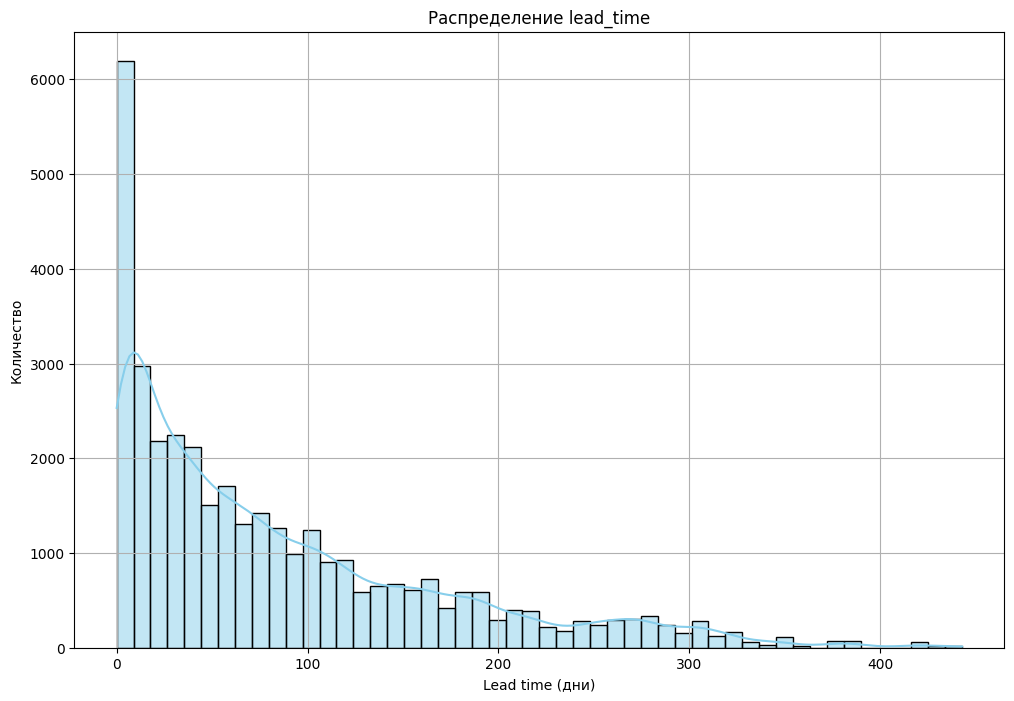

In [24]:
plt.figure(figsize=(12,8))
sns.histplot(df['lead_time'], kde=True, bins=50, color='skyblue')
plt.title(f"Распределение lead_time")
plt.xlabel("Lead time (дни)")
plt.ylabel("Количество")
plt.grid()
plt.savefig('lead_time_histplot.png')
plt.show()

Чем меньше дней остается до даты прибытия, чем чаще происходит бронирование.   
То есть гости склонны бронировать отели в последний момент.

Влияние lead_time на целевую переменную

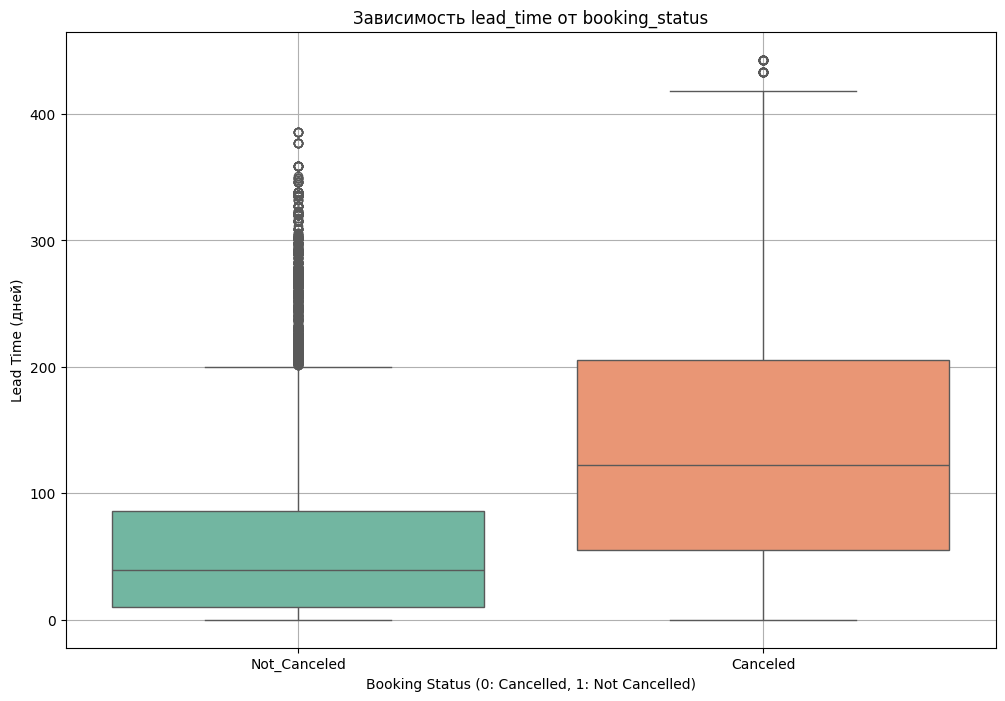

In [25]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x='booking_status', y='lead_time', palette='Set2')
plt.title("Зависимость lead_time от booking_status")
plt.xlabel("Booking Status (0: Cancelled, 1: Not Cancelled)")
plt.ylabel("Lead Time (дней)")
plt.grid()
plt.savefig('lead_time_by_booking_status_boxplot.png')
plt.show()

Бронирование с большим временем до прибытия более подвержены отменам, что логично, так как у людей есть больше времени на то, чтобы обдумать свое решение и поменять его.

Распределение no_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nights

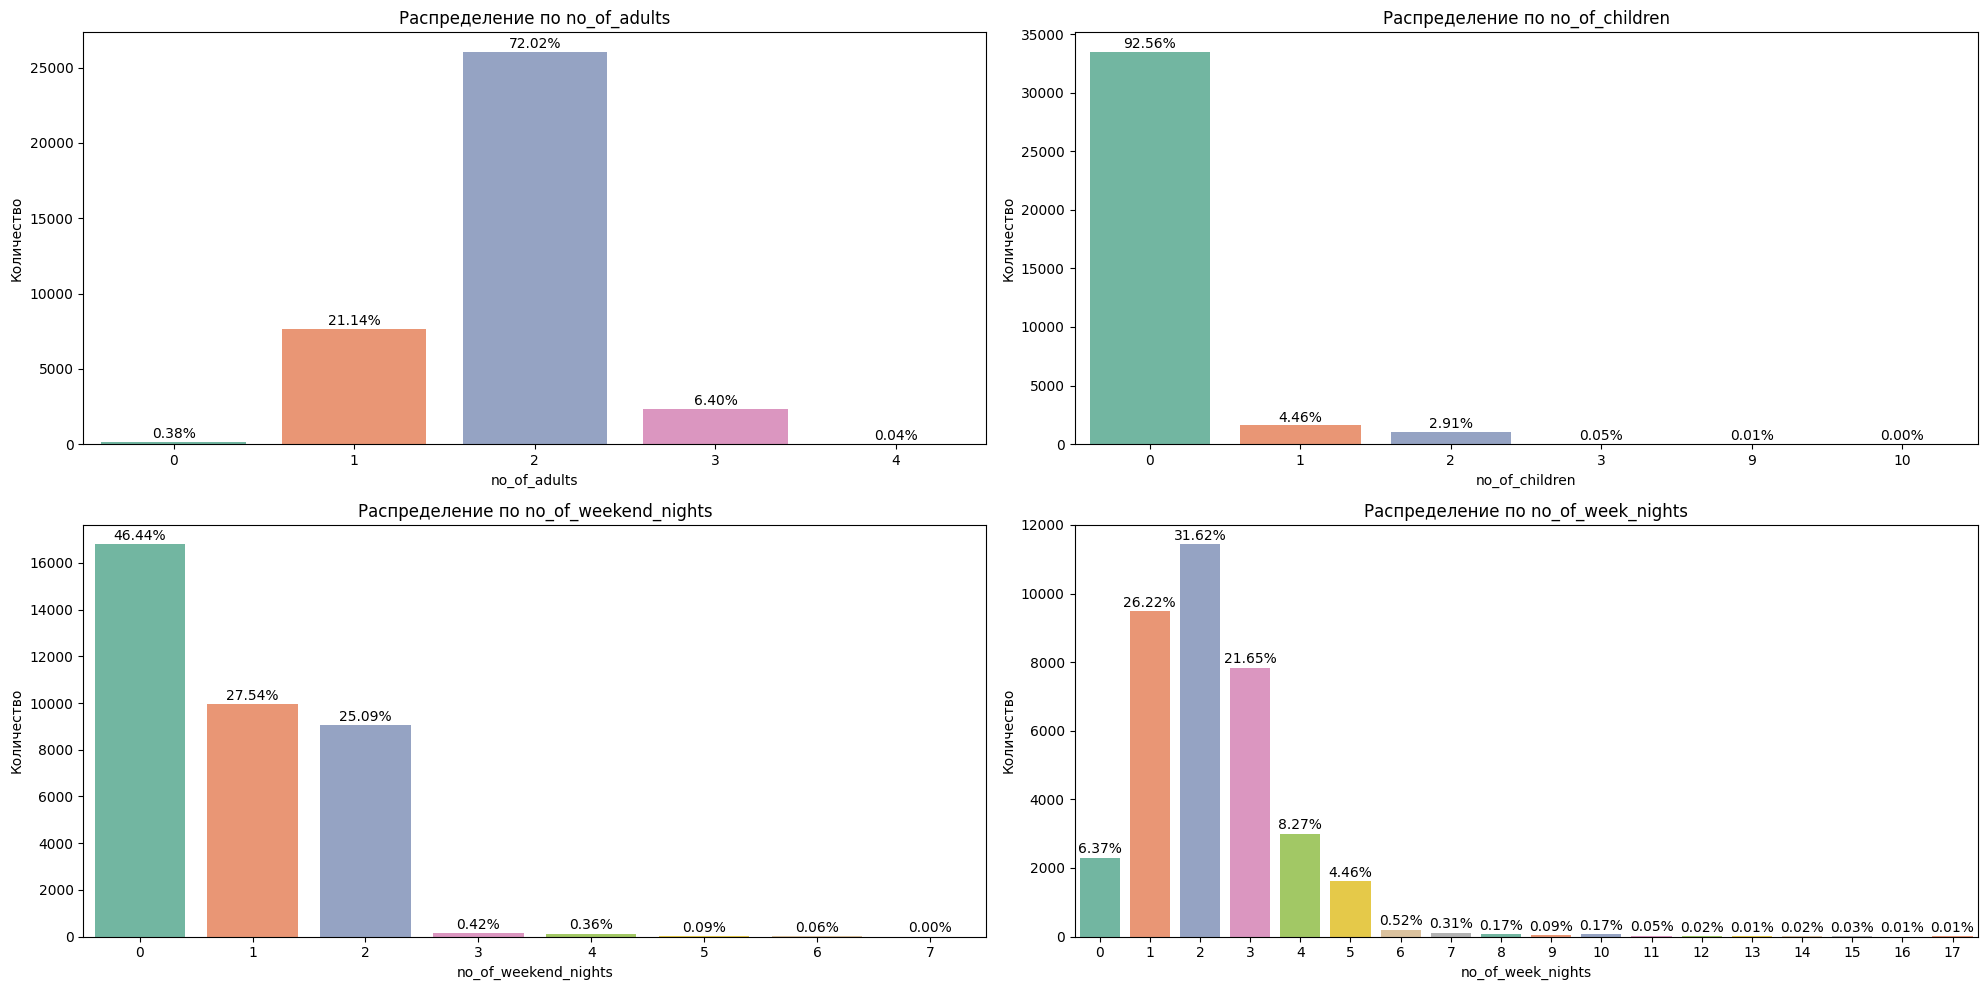

In [26]:
features_to_barplot = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights']
plt.figure(figsize=(20, 10))

for i, feature in enumerate(features_to_barplot, 1):
    plt.subplot(2, 2, i)  
    value_counts = df[feature].value_counts()
    total = value_counts.sum()
    ax = sns.barplot(x=value_counts.index, 
                y=value_counts.values, 
                palette='Set2'
                )
    for p in ax.patches:
        height = p.get_height()
        percentage = 100 * height / total
        ax.text(p.get_x() + p.get_width() / 2, height + 50, 
                f'{percentage:.2f}%',
                ha='center', 
                va='bottom',
                fontsize=10
                )   
    plt.title(f'Распределение по {feature}')
    plt.xlabel(feature)
    plt.ylabel('Количество')

plt.tight_layout()
plt.savefig('adults_children_nights_barplot.png')
plt.show()

- Более трети номеров забронированы на двух взрослых, второе по популярности количество взрослых - 1;
- Около 92% процентов бронируют номера без детей;
- Менее 2% бронируют проживание, захватывающее более одних выходных;
- Распределение количество будних дней имеет положительную ассиметрию, с модой равной 2.

Распределение arrival_date, arrival_month, arrival_year

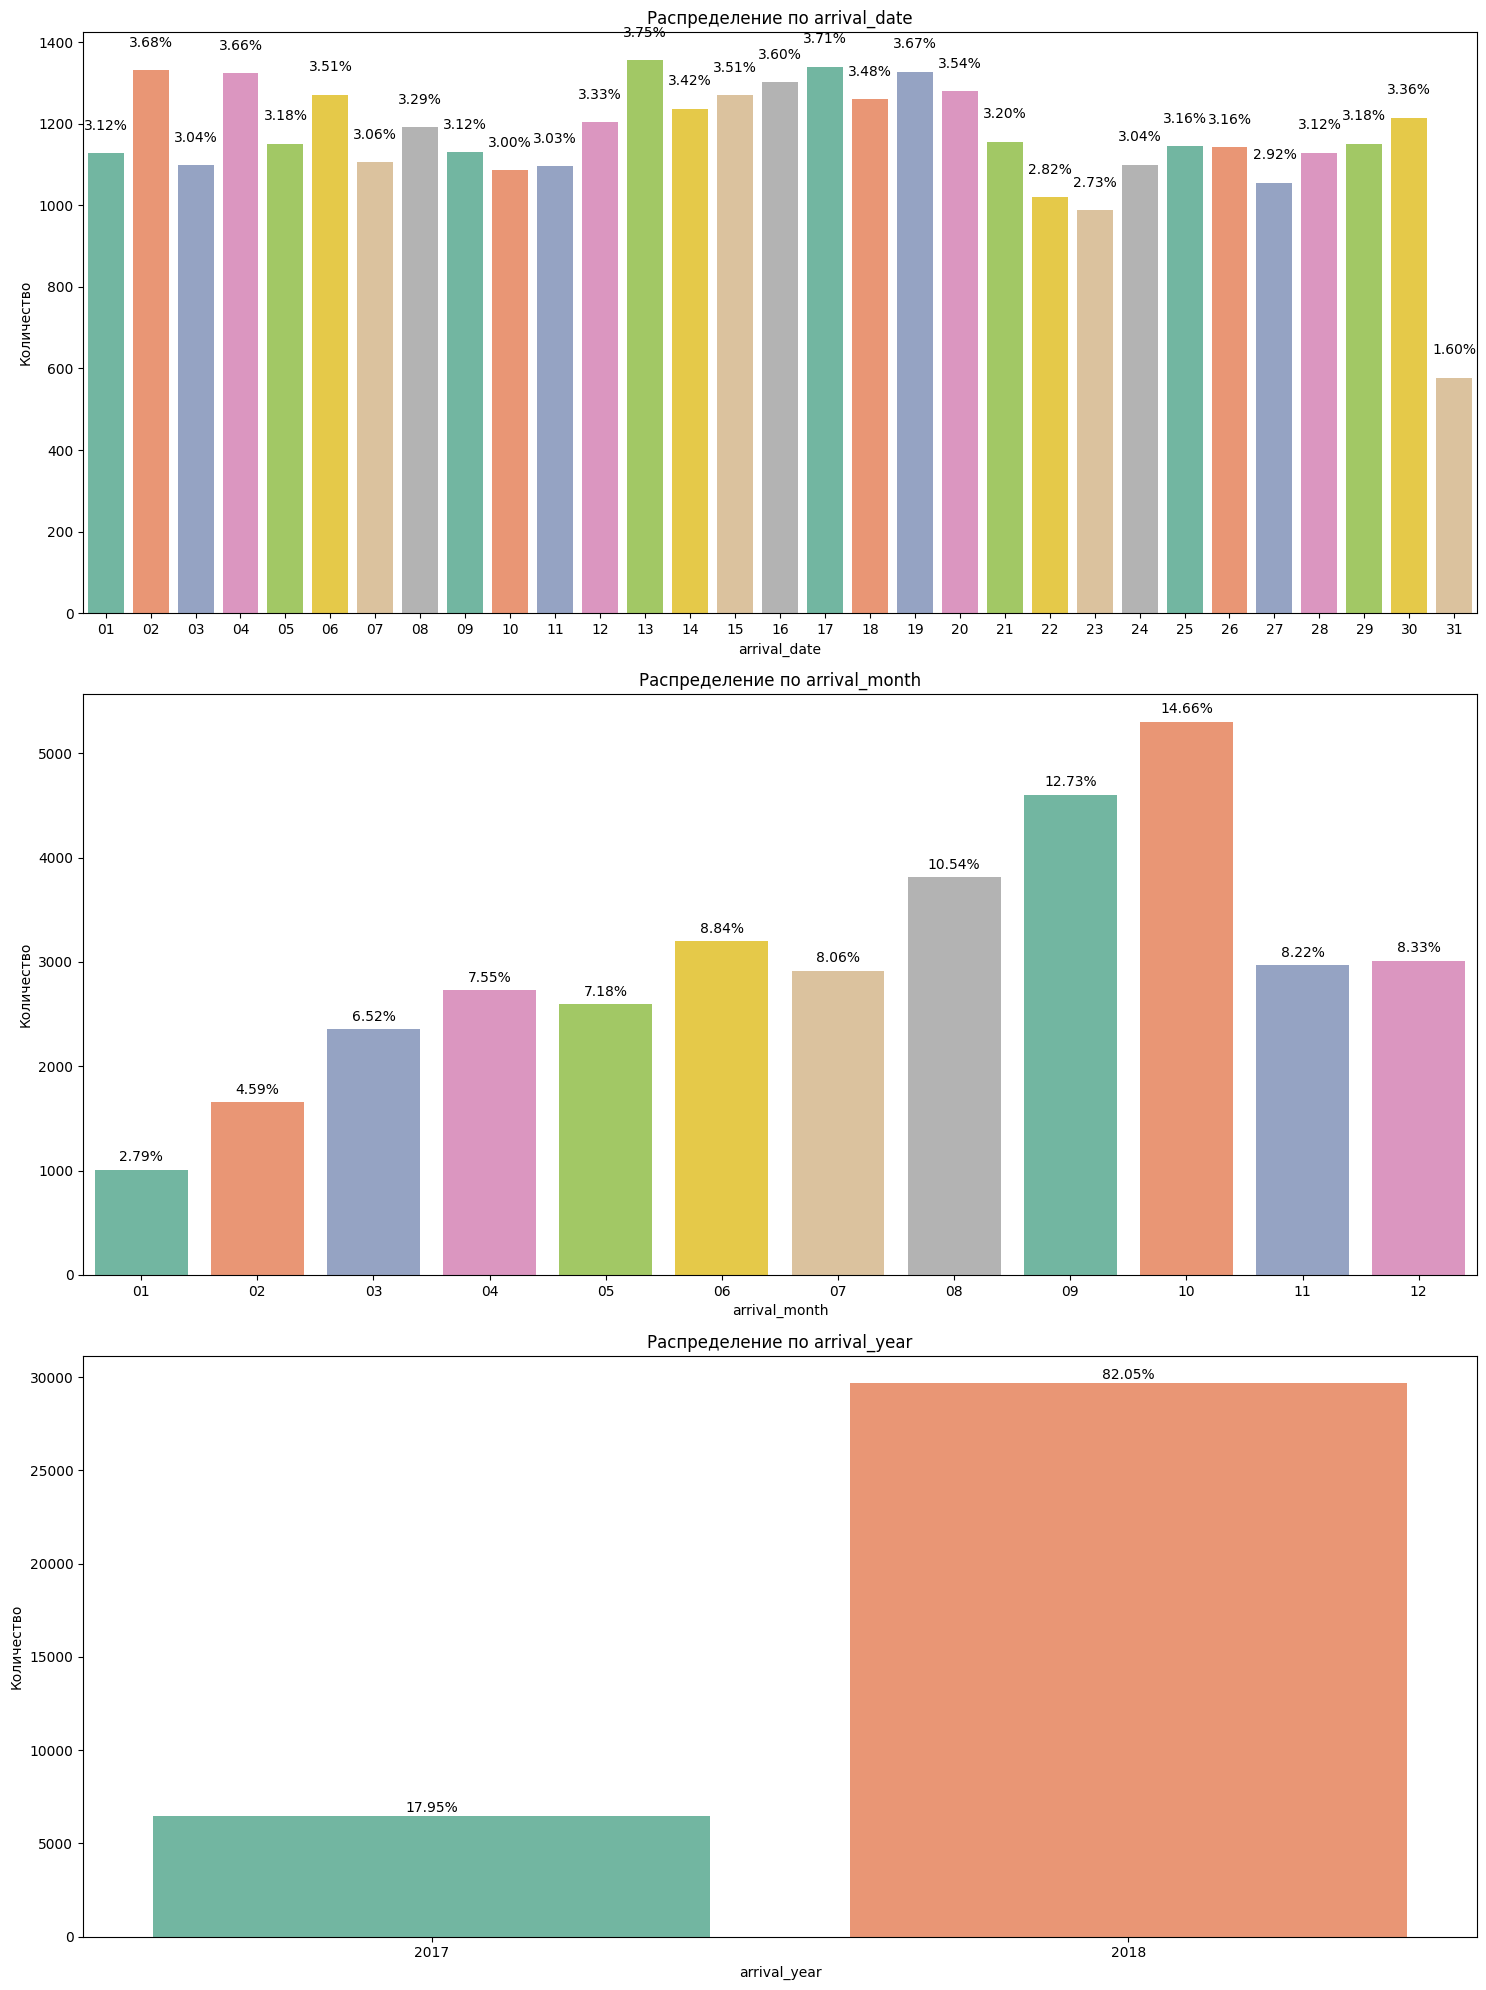

In [27]:
features_to_barplot = ['arrival_date', 'arrival_month', 'arrival_year']
plt.figure(figsize=(15, 20))

for i, feature in enumerate(features_to_barplot, 1):
    plt.subplot(3, 1, i)  
    value_counts = df[feature].value_counts()
    total = value_counts.sum()
    ax = sns.barplot(x=value_counts.index, 
                y=value_counts.values, 
                palette='Set2'
                )
    for p in ax.patches:
        height = p.get_height()
        percentage = 100 * height / total
        ax.text(p.get_x() + p.get_width() / 2, height + 50, 
                f'{percentage:.2f}%',
                ha='center', 
                va='bottom',
                fontsize=10
                )   
    plt.title(f'Распределение по {feature}')
    plt.xlabel(feature)
    plt.ylabel('Количество')

plt.tight_layout()
plt.savefig('arrival_barplot.png')
plt.show()

- Популярные месяцы для бронирования - 8,9,10, что странно, ведь этот вериод не является высокосезонным;
- Бронирования на 2018 год преобладают.

Влияние no_of_previous_cancellations на целевую переменную

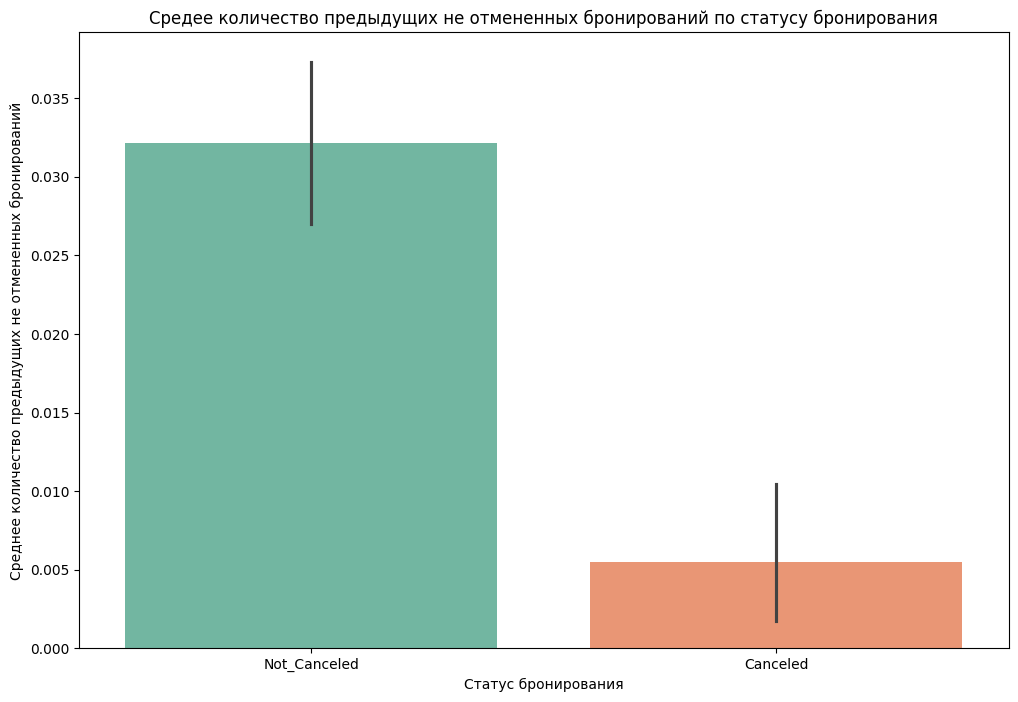

In [28]:
plt.figure(figsize=(12, 8))
sns.barplot(x='booking_status', y='no_of_previous_cancellations', data=df, palette='Set2')
plt.title("Средее количество предыдущих не отмененных бронирований по статусу бронирования")
plt.xlabel("Статус бронирования")
plt.ylabel("Среднее количество предыдущих не отмененных бронирований")
plt.savefig('previous_cancellations_by_booking_status_barplot.png')
plt.show()

Гости с неотмененным бронированием в среднем имеют больше предыдущих неотмененных бронирований.

Распределение цен в зависимости от типа номера

In [29]:
fig = px.box(df, 
             x='room_type_reserved', 
             y='avg_price_per_room', 
             title='Зависимость цены по типа номера',
             labels={'room_type_reserved': 'Тип номера', 'avg_price_per_room': 'Цена (€)'}, 
             color='room_type_reserved',
             color_discrete_sequence=px.colors.qualitative.Set2)
fig.update_layout(width=1000, height=600)
fig.write_image('avg_price_per_room_by_room_type_boxplot.png')
fig.show()

- Тип 7 имеет наибольший разброс цен, при этом наибольшую медианную цену;
- Тип 1 и тип 2 имеют схожий диапазон цен и невысокий разброс;
- Тип 4 и тип 5 также имеют схожий диапазон цен и невысокий разброс;
- У типа 1 присутствует сильно выраженный выброс.

Сгенерируем признак, который будет указывать является ли день прибытия выходным или нет

In [34]:
df['is_weekend'] = df['full_arrival_date'].dt.weekday >= 5
df['is_weekend'] = df['is_weekend'].astype('category')

Сгенерируем признак, который будет отражать отклонение средней цены медианы в зависимости от типа комнаты

In [35]:
median_price= df.groupby('room_type_reserved')['avg_price_per_room'].median()
df['median_price'] = df['room_type_reserved'].map(median_price).astype('float')
df['price_deviation'] = df['avg_price_per_room'] - df['median_price']
df = df.drop('median_price', axis=1)

### Сохранение финального датасета

In [36]:
with open('../data/cleaned_data.pkl', 'wb') as f:
    pickle.dump(df, f)

### Выводы:
1) На этапе очистки данных датасет проверен на наличие дубликатов, отсутствие указанных гостей, отсутствие указаннных ночей проживания, неверную дату прибытия. Найденные строки были удалены.
2) Cозданы два новых признака: 
    - является ли день прибытия выходным? (категориальный бинарный признак)
    - отклонение цены за номер от медианной цены (числовой признак)
3) Построены следующие графики:
    - гистограмма для lead_time
    - ящик с усами для lead_time в зависимости от booking_status
    - barplot для признаков no_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nights, arrival_date, arrival_month, arrival_year
    - barplot для no_of_previous_cancellations в зависимости от booking_status
    - ящик с усами для avg_price_per_room в зависимости от room_type_reserved (интерактивный график)

    Каждый график прокомментирован.
    
